In [1]:
import numpy as np
import os
import matlab.engine
import matplotlib.pyplot as plt
from Camera_util import parse_video, parse_mean_video
import pandas as pd
from natsort import natsorted
import time
import Camera_util 
import importlib
import pickle

In [ ]:
importlib.reload(Camera_util)
recordings_dir = '/Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings'
experiment_filename = '200FPS'
light_levels = [str(i) for i in range(4)]
Camera_util.generate_TTF(recordings_dir, experiment_filename, light_levels)

In [ ]:
importlib.reload(Camera_util)
recordings_dir = '/Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings'
light_levels = [str(i) for i in range(4)]

Camera_util.generate_ms_by_exposure_plot(recordings_dir, light_levels)


Retreiving 0 videos
Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_12.0hz_0NDF.avi


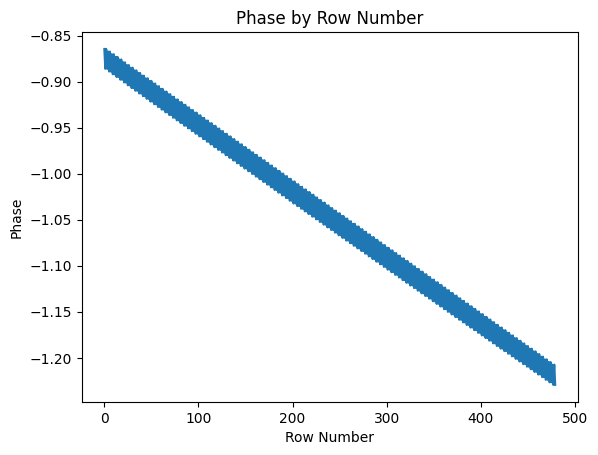

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_25.0hz_0NDF.avi


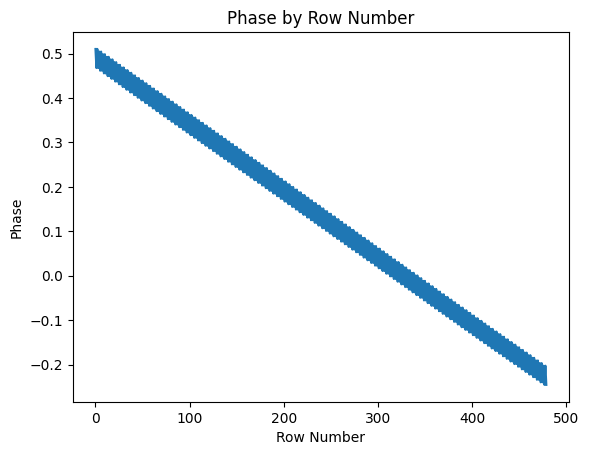

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_6.0hz_0NDF.avi


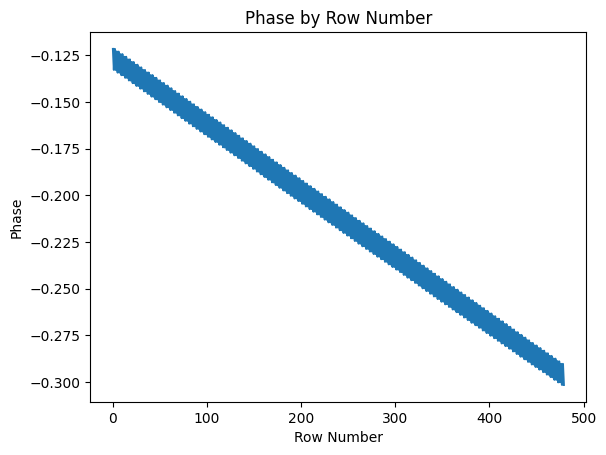

Exposure Time: 1
Mean Microseconds: 9.51107642150057
Std microseconds per row: 0.06987321674339121
Retreiving 1 videos
Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_12.0hz_1NDF.avi


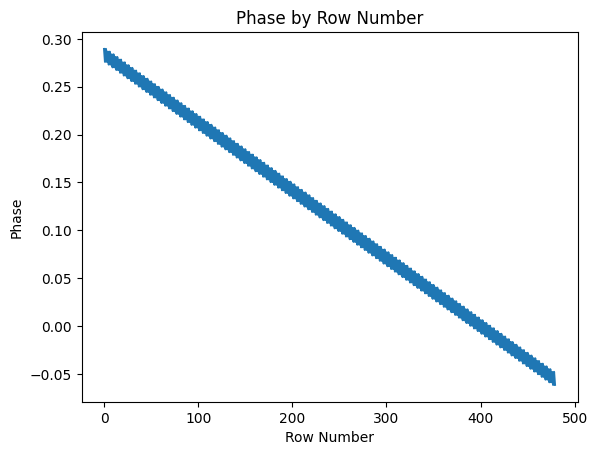

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_25.0hz_1NDF.avi


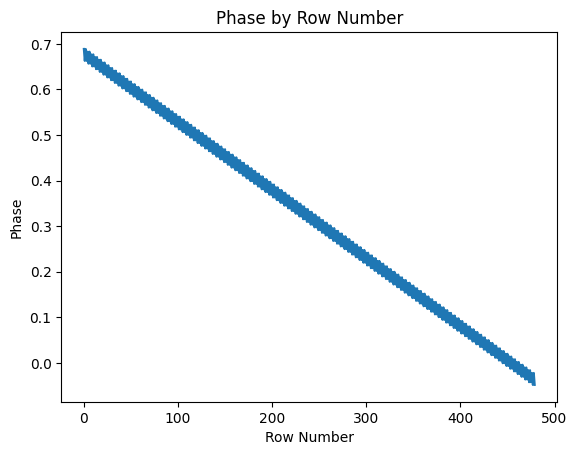

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_6.0hz_1NDF.avi


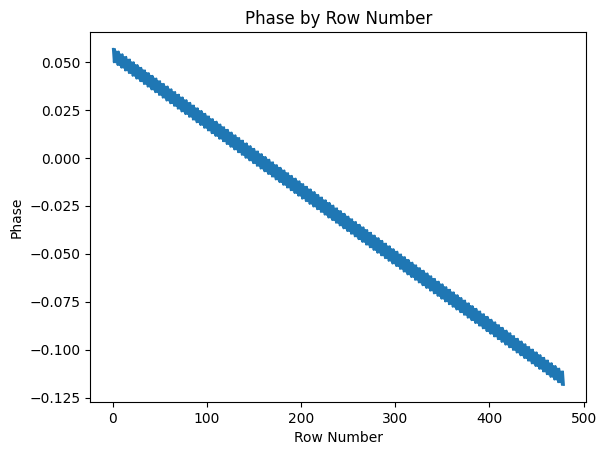

Exposure Time: 2
Mean Microseconds: 9.430751221602527
Std microseconds per row: 0.057127622359760405
Retreiving 2 videos
Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_25.0hz_2NDF.avi


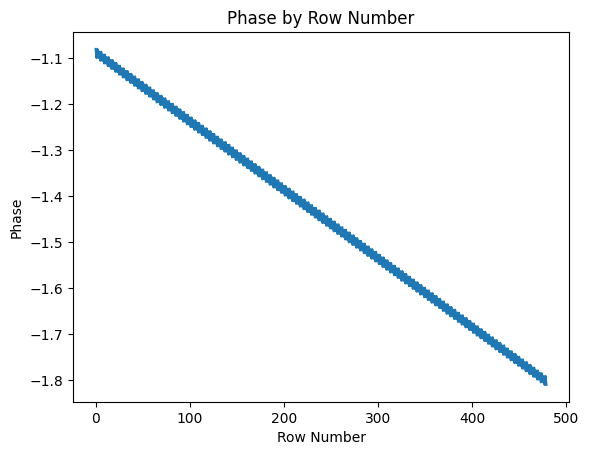

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_12.0hz_2NDF.avi


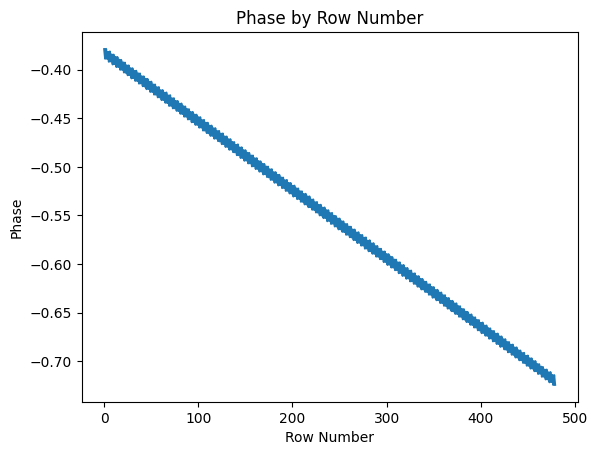

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_6.0hz_2NDF.avi


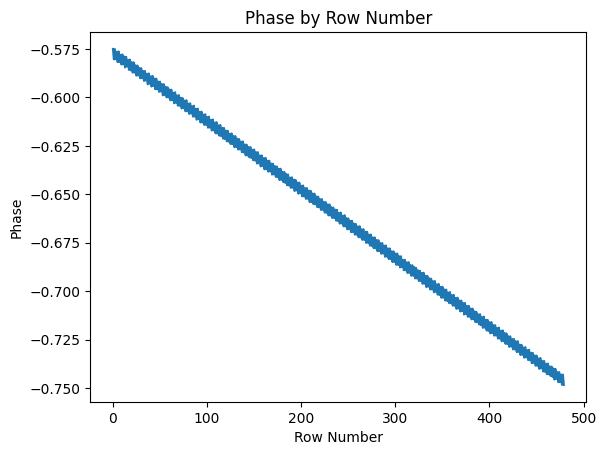

Exposure Time: 2
Mean Microseconds: 9.402173993995225
Std microseconds per row: 0.059300212749629495
Retreiving 3 videos
Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_25.0hz_3NDF.avi


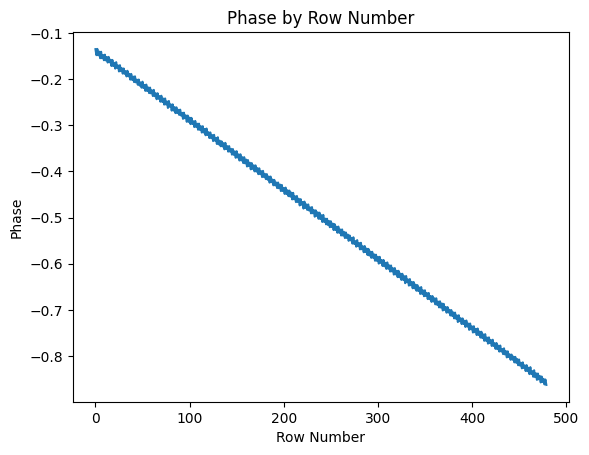

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_12.0hz_3NDF.avi


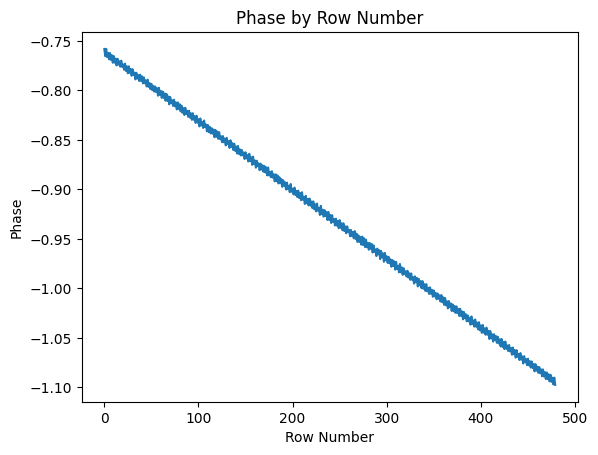

Plotting row phase for /Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings/200FPS_6.0hz_3NDF.avi


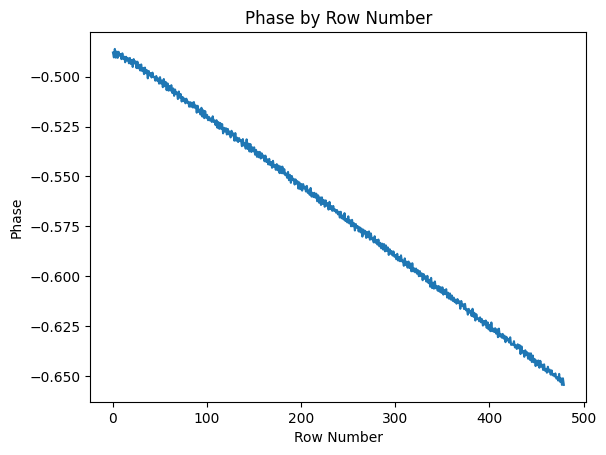

Exposure Time: 2
Mean Microseconds: 9.36262108609847
Std microseconds per row: 0.15231126550726856


In [23]:
importlib.reload(Camera_util)
recordings_dir = '/Users/zacharykelly/Aguirre-Brainard Lab Dropbox/Zachary Kelly/FLIC_data/recordings'
light_levels = [str(i) for i in range(4)]

x = []
y = []
yerr = []


# use numpy .unwrap on the phase vector in the phase by row plot with period of pi

for light_level in light_levels:
    frequencies_to_test = {6, 12, 25}
    microseconds_per_row_list = []

    print(f"Retreiving {light_level} videos")
    videos = [(os.path.join(recordings_dir, file), parse_video(os.path.join(recordings_dir, file))) for file in os.listdir(recordings_dir) if f"{light_level}NDF" in file and float(file.split('_')[1][:-2]) in frequencies_to_test]


    for (path, video) in videos:
        print(f'Plotting row phase for {path}')
        f = Camera_util.parse_recording_filename(os.path.split(path)[1])['frequency']

        if(f not in frequencies_to_test): continue

        slope = Camera_util.generate_row_phase_plot(video, f)
        secs_per_row = slope/(2*np.pi*f)
        microseconds_per_row_list.append(abs(secs_per_row*1000000))

    microseconds_per_row_list = np.array(microseconds_per_row_list)

    exposure_time = 1 if light_level == '0' else 2
    mean_microseconds_per_row = np.mean(microseconds_per_row_list)
    std_microseconds_per_row = np.std(microseconds_per_row_list)

    print(f"Exposure Time: {exposure_time}")
    print(f"Mean Microseconds: {mean_microseconds_per_row}")
    print(f"Std microseconds per row: {std_microseconds_per_row}")

    x.append(exposure_time)
    y.append(mean_microseconds_per_row)
    yerr.append(std_microseconds_per_row)




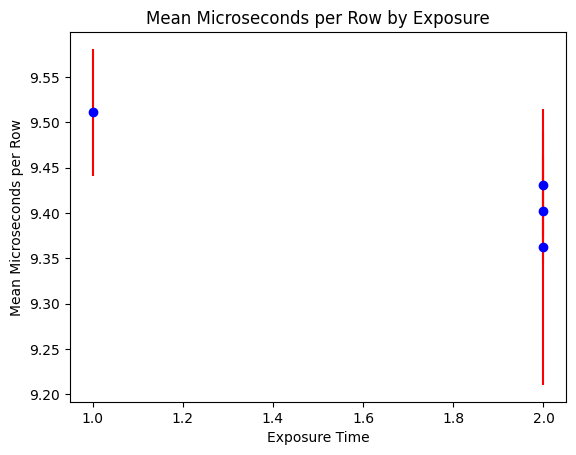

In [24]:
x = np.array(x)
y = np.array(y)



plt.errorbar(x, y, yerr=yerr, linestyle='', marker='o', color='blue', ecolor='red')
plt.title('Mean Microseconds per Row by Exposure')
plt.xlabel('Exposure Time')
plt.ylabel('Mean Microseconds per Row')
plt.show()